In [1]:
from common import *

In [2]:
# Load dataset
def gen_data():
    for packet_type, ext in zip(['Acks', 'Payload', 'Acks + Payload'], ['_acks', '_data', '']):
        item = pd.read_csv(ROC_PATH / 'DL' / 'exp01' / 'drift' / f'subsampled_ROC_100{ext}.txt', sep=' ', names=['TPR', 'FPR'])
        item['Packet type'] = packet_type
        item['Classifier'] = 'DL (Drift)'
        yield item

data = pd.concat(gen_data()).reset_index(drop=True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `data_acks_both-crop.pdf'.


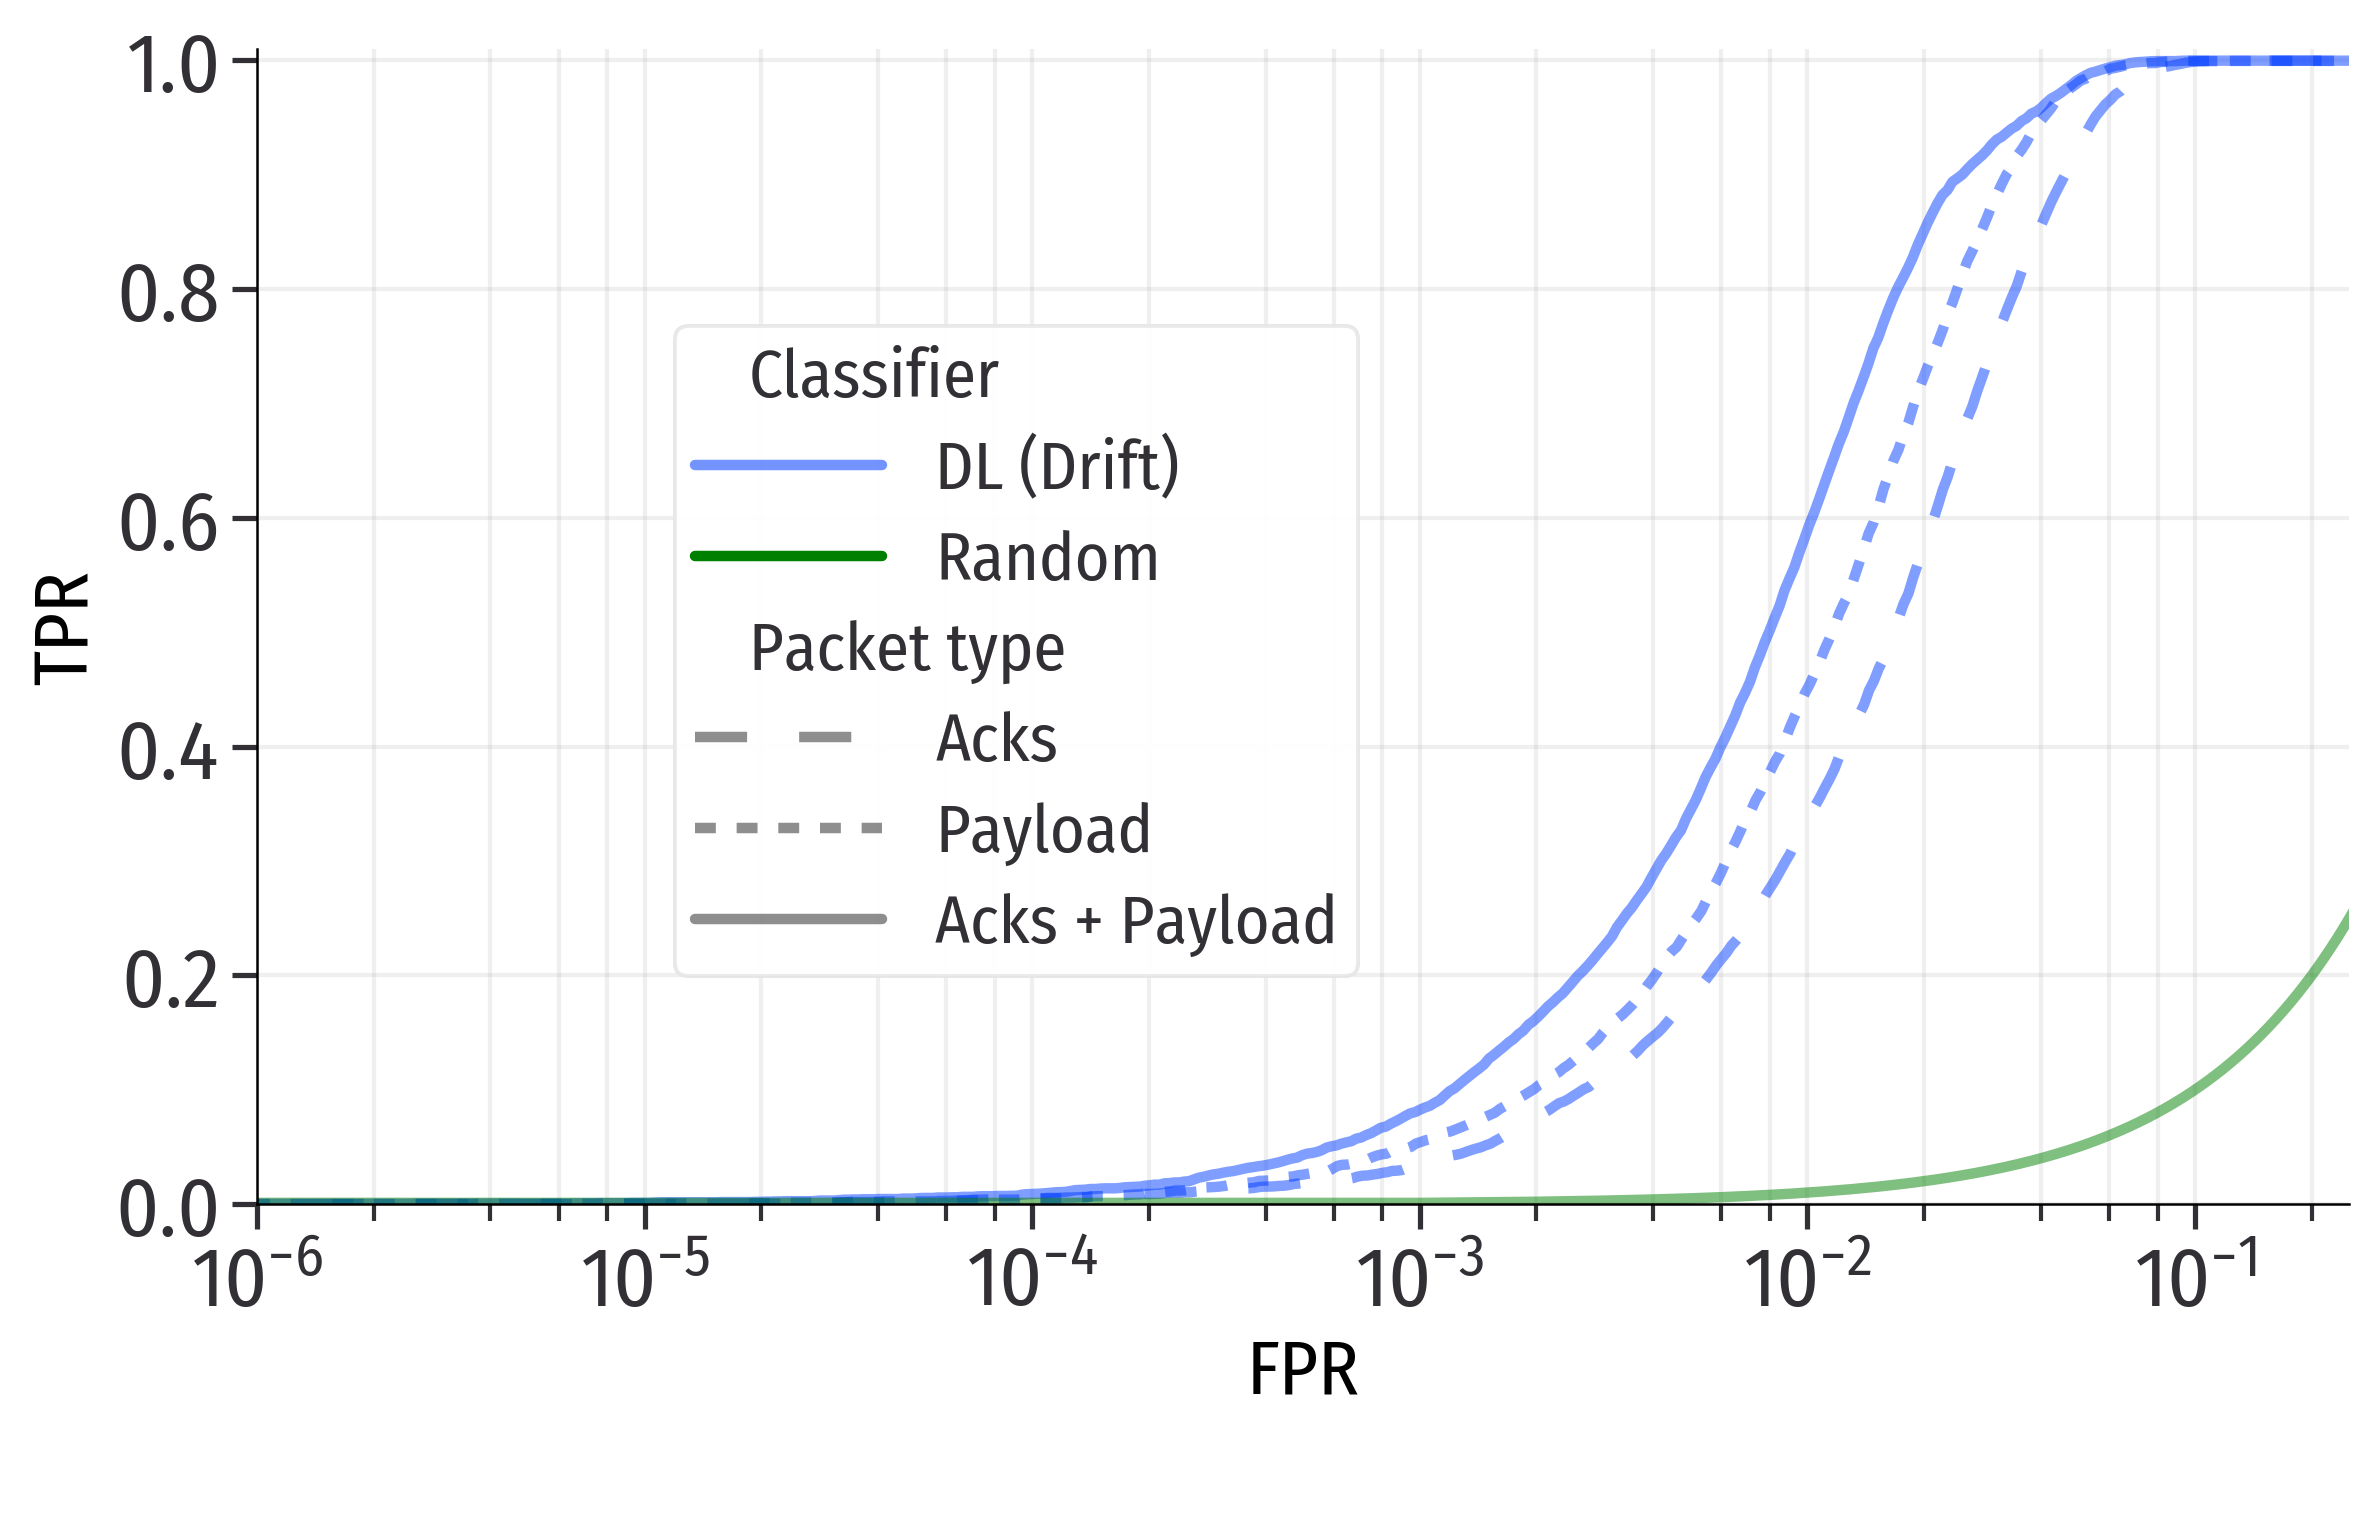

In [3]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)
g = sns.lineplot(data=data, x='FPR', y='TPR', style='Packet type', hue='Classifier', dashes=dashes2, legend='full', ci=None, palette='bright')

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
handles.insert(2, random_line)
labels.insert(2, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.2, 0.76),
                         loc='upper left',
                         borderaxespad=0,
                         borderpad=0.3,
                         ncol=1)
g.add_artist(windows_leg)

# shift legend titles to the left
for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[3].get_children()[0].set_width(0)

save_fig('data_acks_both')